<a href="https://colab.research.google.com/github/PLUXINDUI/Ispm_course/blob/main/%D0%A3%D0%9F%D0%A1%D0%98%D0%A1/%22%D0%A3%D0%9F%D0%98%D0%A1_%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%E2%84%963_%D0%A0%D0%B0%D0%B7%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_UML_%D0%B4%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Задание №3. Разработка UML-диаграмм для проектирования информационной системы**

Тема диплома: Разработка настольного приложения для симуляции влияния аэродинамических модификаций кузова автомобиля на его скоростные характеристики

### **1. Диаграмма классов**

**Диаграмма классов** представляет статическую структуру системы, отображая классы, их атрибуты, методы и взаимосвязи между ними. Это базовая диаграмма объектно-ориентированного моделирования, которая описывает типы объектов в системе и различные виды статических отношений между ними. Применяется на этапе проектирования для определения архитектуры программного обеспечения.

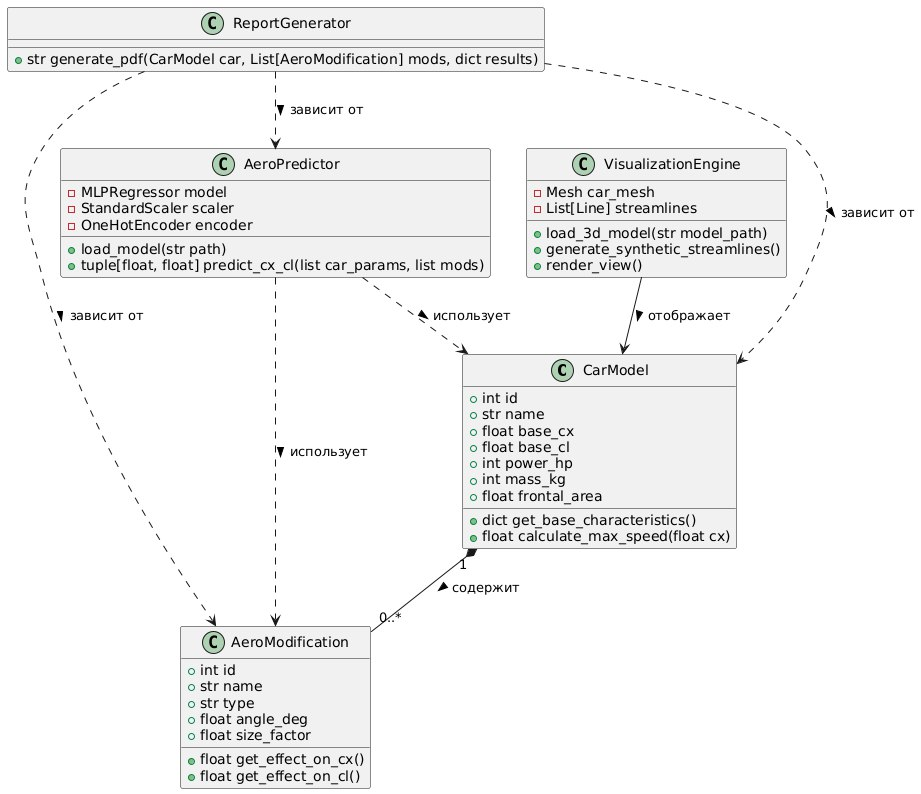

1. CarModel — модель автомобиля
Это основной объект, с которого начинается вся симуляция.
Каждый автомобиль в приложении — это экземпляр класса CarModel.

Атрибуты — это его «паспортные данные»:
id, name — идентификатор и название (например, "DrivAer Fastback").
base_cx, base_cl — базовые аэродинамические коэффициенты без модификаций (берутся из датасета DrivAerML или справочников).
power_hp, mass_kg — нужны для расчёта скоростных характеристик (макс. скорость зависит не только от C
x
​
  , но и от мощности и массы!).
frontal_area — лобовая площадь (в м²), участвует в формуле сопротивления воздуха.
Методы — что умеет делать объект:
get_base_characteristics() → возвращает словарь с базовыми данными (удобно для отображения в интерфейсе).
calculate_max_speed(cx: float) → пересчитывает максимальную скорость с учётом нового C
x
​

2. AeroModification — аэродинамический элемент
Это любой внешний элемент, который можно «надеть» на автомобиль: спойлер, диффузор, обвес и т.д.

Атрибуты:
name, type — для отображения в интерфейсе и фильтрации.

angle_deg — угол установки (например, 15° у спойлера — критично влияет на прижимную силу).

size_factor — относительный размер (0.8 = 80% от стандартного), чтобы не хардкодить каждую модель.
Методы:

get_effect_on_cx() и get_effect_on_cl() — возвращают поправки к коэффициентам.


3. AeroPredictor — «мозг» на основе нейросети
Это обёртка над обученной моделью, которая делает предсказания быстро и без CFD.

Атрибуты (все приватные, обозначены –):

model — сама нейросеть (MLPRegressor из scikit-learn).

scaler, encoder — объекты для предобработки данных (нормализация и кодирование категорий), обязательно сохранённые после обучения.

Методы:
load_model(path) — загружает модель и препроцессоры из файлов (.joblib).

predict_cx_cl(...) — главный метод: принимает параметры авто и список модификаций → возвращает новые C
x
​
  и C
L
​
  .

  4. VisualizationEngine — визуализатор потоков
Отвечает за наглядность — ключевую часть учебного процесса.

Атрибуты:
car_mesh — загруженная 3D-модель (из .stl или .obj).

streamlines — список линий потока (каждая — массив 3D-точек).

Методы:

load_3d_model() — загружает геометрию автомобиля.

generate_synthetic_streamlines() — генерирует упрощённые линии, имитирующие обтекание (например, плавный изгиб над крышей, завихрение сзади).

render_view() — отображает всё в окне (через PyVista).

5. ReportGenerator — генератор отчётов

Метод:

generate_pdf(...) → создаёт PDF с:
исходными и итоговыми характеристиками,
списком установленных элементов,
скриншотом 3D-модели (опционально),
выводами.

Связи между классами — как всё работает вместе
CarModel — * AeroModification (агрегация)
→ Автомобиль может иметь несколько элементов, но элементы могут существовать без авто (например, в каталоге).
→ В коде: car.modifications = [spoiler, diffuser]
AeroPredictor ← зависит от CarModel и AeroModification
→ Чтобы сделать предсказание, AeroPredictor берёт данные из этих объектов.
→ Но он не владеет ими — просто использует.
VisualizationEngine — ассоциирован с CarModel
→ Визуализатор нуждается в модели авто, чтобы отобразить её и наложить потоки.
ReportGenerator ← зависит от всех трёх
→ Чтобы сгенерировать отчёт, нужно знать:
какой автомобиль (CarModel),
какие элементы установлены (AeroModification),
какие характеристики получились (AeroPredictor).


### **2. Диаграмма вариантов использования**

**Диаграмма вариантов использования** визуализирует функциональные требования к системе с точки зрения внешних пользователей (акторов). Она определяет, какие функции система должна выполнять для каждой категории пользователей, не вдаваясь в детали реализации. Эта диаграмма служит инструментом коммуникации между разработчиками и заказчиками на ранних этапах проектирования.


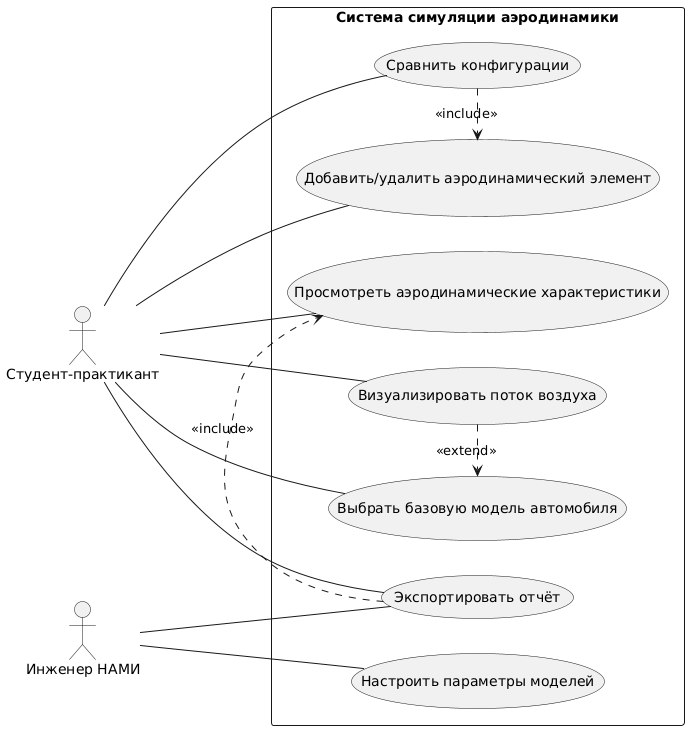

Акторы:
Студент-практикант — основной пользователь.

Преподаватель — настраивает параметры, проверяет результаты.

Основные варианты использования:

1.Выбрать базовую модель автомобиля
Студент выбирает автомобиль из списка (например, «Седан DrivAer», «Хэтчбек», «Универсал»).

2.Добавить/удалить аэродинамический элемент
Возможность установить спойлер, диффузор, боковые юбки с настройкой угла, размера и положения.

3.Просмотреть аэродинамические характеристики
Отображение текущих значений: C
x
​
  , C
L
​
  , максимальная скорость, время разгона 0–100 км/ч.

4.Визуализировать поток воздуха
Показ 3D-модели с ламинарными линиями обтекания.

5.Сравнить конфигурации
Возможность сохранить текущую настройку и сравнить с другой («до / после»).

6.Экспортировать отчёт
Генерация PDF с описанием модификаций и их влияния.
Отношения:

«Экспортировать отчёт» → include → «Просмотреть аэродинамические характеристики»
(нельзя экспортировать то, что не рассчитано).

«Визуализировать поток воздуха» → extend → «Выбрать базовую модель автомобиля»
(визуализация возможна только после выбора модели).

«Сравнить конфигурации» → include → «Добавить/удалить аэродинамический элемент»
(сравнение подразумевает наличие хотя бы двух разных наборов элементов).


### **3. Диаграмма последовательности**

**Диаграмма последовательности** иллюстрирует временную последовательность взаимодействия объектов в рамках конкретного сценария работы системы. Она показывает, какие сообщениями обмениваются объекты и в каком порядке это происходит. Используется для моделирования логики алгоритмов и детализации вариантов использования.


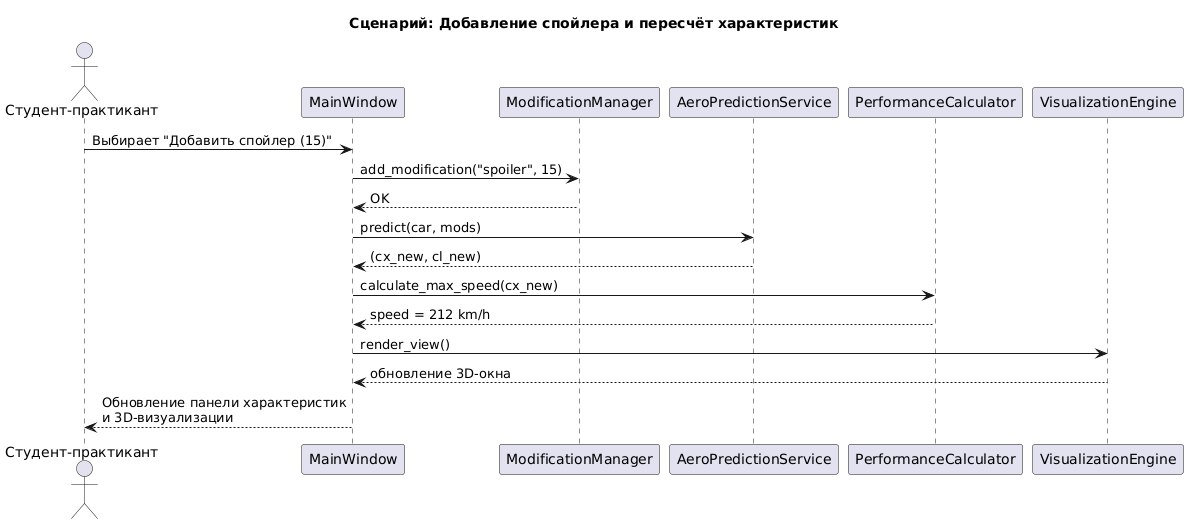

Сценарий: «Студент добавляет спойлер и получает обновлённые характеристики»

Участники:

Студент-практикант

MainWindow (UI)

ModificationManager

AeroPredictionService

PerformanceCalculator

VisualizationEngine

Последовательность:

Студент выбирает «Добавить спойлер» в MainWindow.

MainWindow вызывает ModificationManager.add_modification("spoiler", angle=15).

ModificationManager обновляет список активных модификаций.

MainWindow запрашивает у AeroPredictionService: predict(car, mods).

AeroPredictionService загружает параметры, нормализует, вызывает .predict(), возвращает (cx_new, cl_new).

MainWindow передаёт cx_new в PerformanceCalculator → получает max_speed.

MainWindow обновляет панель характеристик.

MainWindow запускает VisualizationEngine.render_view() → обновляется 3D-окно.

**4. Диаграмма компонентов (Component Diagram)**

Эта диаграмма компонентов представляет собой высокоуровневый взгляд на архитектуру системы, который служит руководством для разработчиков и помогает в планировании работ и распределении задач между командами.

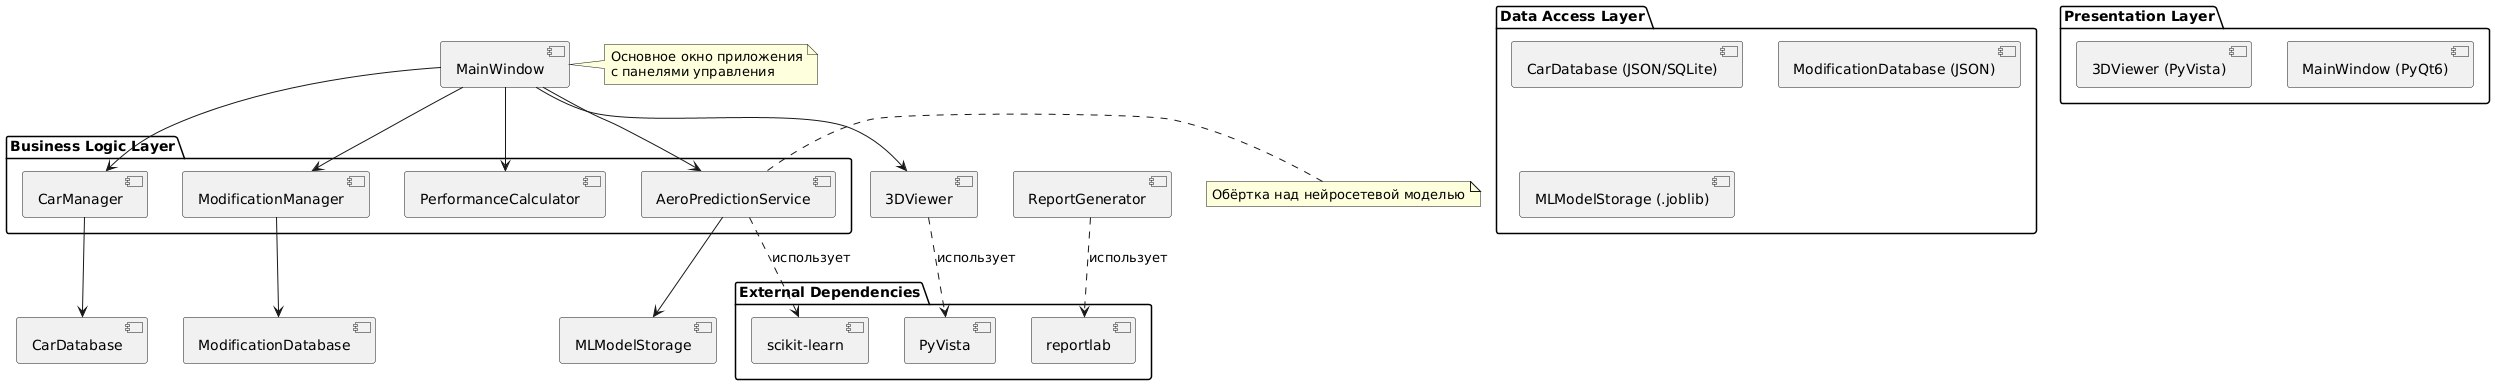

Компоненты по уровням:

Presentation Layer (UI)

- MainWindow — основное окно приложения (PyQt6)

- 3DViewer — виджет визуализации (PyVista)

Business Logic Layer

- CarManager — управление моделями автомобилей

- ModificationManager — управление элементами

- AeroPredictionService — обёртка над нейросетью

- PerformanceCalculator — расчёт скоростных характеристик

Data Access Layer

- CarDatabase — JSON/SQLite с автомобилями

- ModificationDatabase — JSON с элементами и их параметрами

- MLModelStorage — .joblib файлы модели и препроцессоров

External Dependencies

- PyVista — 3D-рендеринг

- scikit-learn — нейросеть

- reportlab — экспорт PDF

Интерфейсы:

- ICarRepository — методы загрузки автомобилей

- IAeroPredictor — метод predict(cx, cl)

- IVisualization — метод render()

Зависимости:

- UI → Business Logic

- Business Logic → Data Access

- Business Logic → External (scikit-learn, PyVista)